In [1]:
from ctlearn_manager.tri_model import CTLearnTriModelManager
from ctlearn_manager.io.io import load_model_from_index

🔧 Using cluster None with account None and python environment ctlearn-cluster
🔧 Using cluster None with account None and python environment ctlearn-cluster


In [2]:
MODEL_INDEX_FILE = "/home/blacave/CTLearn/Software/CTLearn-Manager/ctearn_models_index.h5"
energy_model = load_model_from_index("energy_stereo_20deg", MODEL_INDEX_FILE)
direction_model = load_model_from_index("direction_stereo_20deg", MODEL_INDEX_FILE)
type_model = load_model_from_index("type_stereo_20deg", MODEL_INDEX_FILE)
Stereo_Tri_Model = CTLearnTriModelManager(direction_model=direction_model, energy_model=energy_model, type_model=type_model)

🧠 Model name: energy_stereo_20deg
🧠 Model name: direction_stereo_20deg
🧠 Model name: type_stereo_20deg


# 🔀 If you have multiple testing files for same position, merge them

In [3]:
Stereo_Tri_Model.merge_DL2_files(20, 0, "/home/blacave/CTLearn/Data/DL2/Testing/merged/gamma_point_50_300E3GeV_20_20deg.h5", "/home/blacave/CTLearn/Data/DL2/Testing/merged/proton_diffuse_400_500E3GeV_20_20deg.h5", overwrite=True)

✅ There already is a single gamma file for zenith 20 and azimuth 0
✅ There already is a single proton file for zenith 20 and azimuth 0


# 📡 Produce the IRFs

In [4]:
config = "/home/blacave/CTLearn/Software/CTLearn-Manager/src/ctlearn_manager/resources/public-conf.yml"
output_cuts_file="/home/blacave/CTLearn/Data/CTLearn_Models_SST1M/IRFs/20deg70_stereo_cuts.fits"
output_irf_file="/home/blacave/CTLearn/Data/CTLearn_Models_SST1M/IRFs/20deg70_stereo_IRFs.fits"
output_benchmark_file="/home/blacave/CTLearn/Data/CTLearn_Models_SST1M/IRFs/20deg70_stereo_benchmark.fits"

In [5]:
Stereo_Tri_Model.produce_irfs(20, 0, 
                              config=config, 
                              output_cuts_file=output_cuts_file, 
                              output_irf_file=output_irf_file,
                              output_benchmark_file=output_benchmark_file,
                              )

💾 Model direction_stereo_20deg IRF data update:
	➡️ IRF data updated
💾 Model energy_stereo_20deg IRF data update:
	➡️ IRF data updated
💾 Model type_stereo_20deg IRF data update:
	➡️ IRF data updated


2025-02-17 12:15:14,685 WARNING [ctapipe.ctapipe-optimize-event-selection] (optimize_event_selection.setup): Optimizing cuts without electron file.
100%|██████████| 8/8 [00:00<00:00, 12.37it/s]
2025-02-17 12:15:34,275 WARNING [ctapipe.ctapipe-compute-irf] (compute_irf.setup): Estimating background without electron file.
2025-02-17 12:15:34,276 WARNING [ctapipe.irf.binning] (binning.check_bins_in_range): Valid range for background reco energy is [0.3768] to [150.], got [1.5000e-02 2.3773e-02 ... 9.4644e+01 1.5000e+02]
2025-02-17 12:15:34,281 WARNING [ctapipe.irf.binning] (binning.check_bins_in_range): Valid range for Sensitivity reco energy is [0.3768] to [150.], got [1.5000e-02 2.3773e-02 ... 9.4644e+01 1.5000e+02]
/home/blacave/miniforge3/envs/ctlearn-cluster/lib/python3.10/site-packages/pyirf/irf/effective_area.py:29: RuntimeWarning: invalid value encountered in divide
  return (n_selected / n_simulated) * area


# 📉 Plot benchmark and IRFs

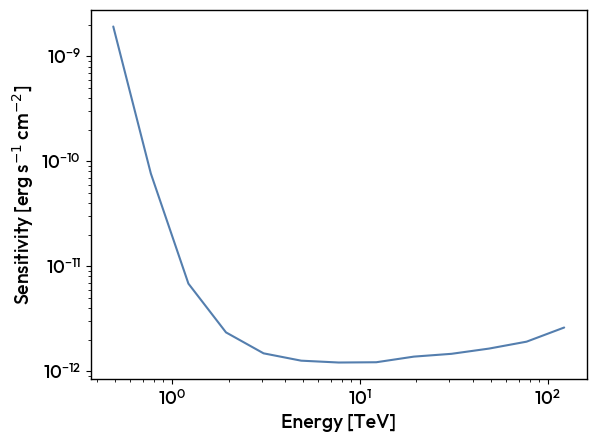

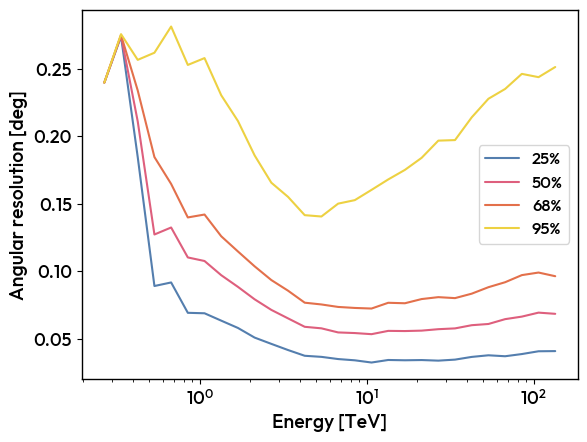

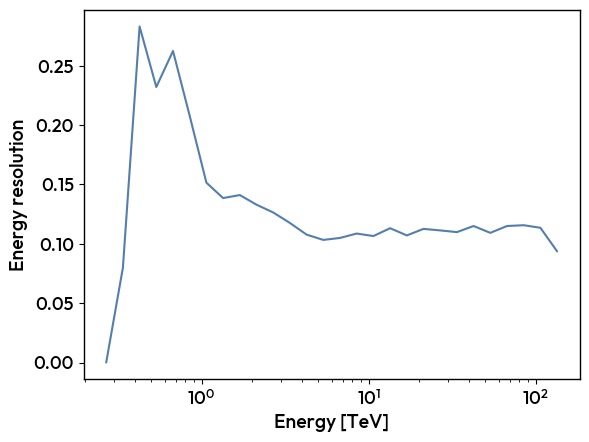

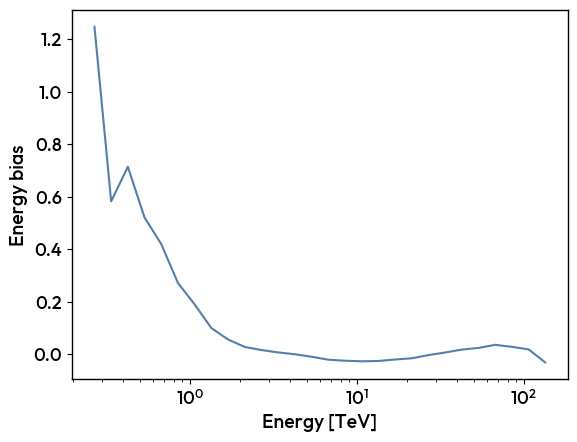

In [6]:
Stereo_Tri_Model.plot_benchmark(20, 0)

/home/blacave/miniforge3/envs/ctlearn-cluster/lib/python3.10/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


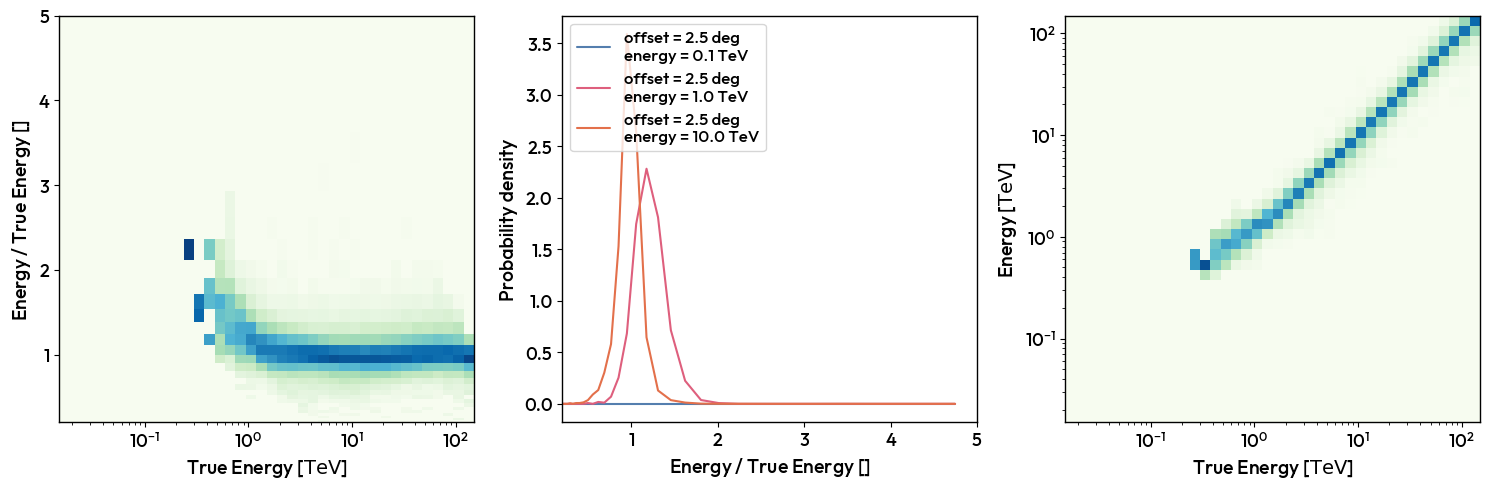

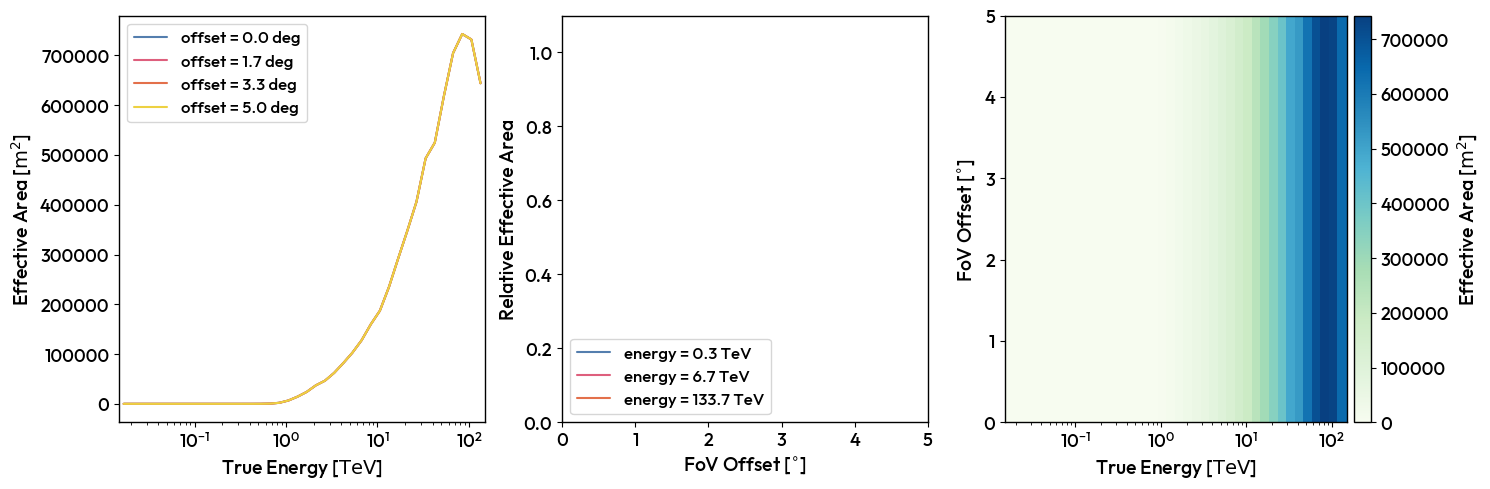

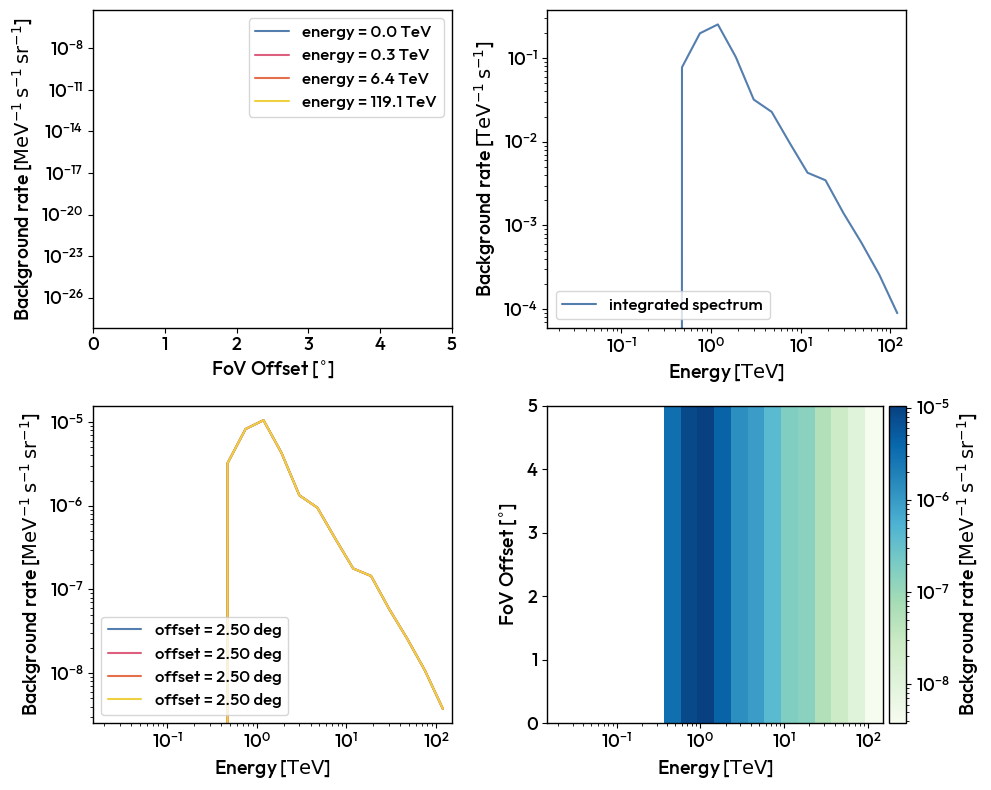

In [7]:
Stereo_Tri_Model.plot_irfs(20, 0)